In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import rbfopt
from linearObjective import linearTauSolver
import src.support as src
from linearTVSR import linearTVSRModel
import statsmodels.api as sm
os.chdir("/Users/aaronpickering/Desktop/projects/cronus/")

Simulated Problem (Linear Model):
- y = A*x + e
- A = 2
- e is defined by N(0,1)
- The input to the system, x is either 0 or a N(0,1))
- We can't actually observe x(t), but rather we observe x(t+tau) where tau is N(0,1)
- **Can we infer the value of A?**

In [19]:
# Define additional variables
A = np.array(2, dtype="float")
np.random.seed(20)
x = src.create_input(100, 0.2)

X, bounds = src.decompose_vector(x, return_bounds=True)
# Generate a random shift seq
np.random.seed(21)
real_shifts = np.round(np.random.randn(X.shape[0]))
real_shifts = np.array(real_shifts, dtype="int")

# Observed values of x
xi = np.sum(src.shift_array(X, np.array(real_shifts, dtype="int")), axis=0)

# Simulate the real effect of x
X_shift = src.shift_array(X, np.array(real_shifts, dtype="int"))
X_shift = src.hor_mul(X_shift, A)

# Build the target variable 'y'
y = np.sum(X_shift, axis=0) + np.random.randn(X_shift.shape[1])

# Define the error distributions (mean and sd for both the time and y axis)
tu=0
tsd=1
u=0
sd=1

## Plot the Sequences

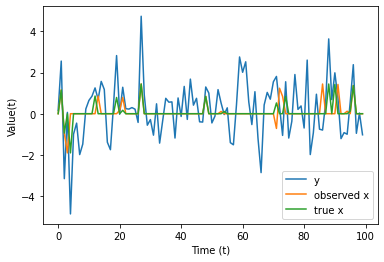

In [20]:
# Plot the sequences
plt.plot(y)
plt.plot(x)
plt.plot(xi)
plt.xlabel("Time (t)")
plt.ylabel("Value(t)")
plt.legend(['y',"observed x","true x"])
plt.show()

Because of the time shifts, the values are not so highly correlated.

In [10]:
df = pd.DataFrame({"x":x,"y":y})
df.corr()

,x,y
x,1.000000,0.247769
y,0.247769,1.000000


### Solve via Maximum Likelihood Estimation

The likelihood for the real values of the shifts (Taus) and error (in the y axis) are given below.

In [11]:
# For comparison, the log likelihood of the actual maximum value (tau-error + y axis error)?
f = linearTauSolver(X, y, 2, 0, 1, 0, 1)
f.objective_function(real_shifts)

170.72072985745868

**Setup the Mixed Integer Solver (RBFopt)** 

In [12]:
# Define optimizer settings
settings = rbfopt.RbfoptSettings(max_evaluations=100, 
                                 max_noisy_evaluations=10,
                                 minlp_solver_path='/Users/aaronpickering/Desktop/bonmin-osx/bonmin',
                                 print_solver_output=False)

In [13]:
## TVS (temporary name for reference) Regression
tvs = linearTVSRModel(settings)
tvs.fit(x, y)

[0. 2. 2.]
Likelihood: 205.6
[1.e-08 2.e+00 2.e+00]
Likelihood: 205.6
[0.         2.00000001 2.        ]
Likelihood: 205.6
[0.         2.         2.00000001]
Likelihood: 205.6
[0.82735405 1.60283172 1.60283172]
Likelihood: 190.9
[0.82735406 1.60283172 1.60283172]
Likelihood: 190.9
[0.82735405 1.60283173 1.60283172]
Likelihood: 190.9
[0.82735405 1.60283172 1.60283173]
Likelihood: 190.9
[4.13677023 0.01415861 0.01415861]


/Users/aaronpickering/Desktop/projects/cronus/src/support.py:80: RuntimeWarning: divide by zero encountered in log
  l = np.log(norm.pdf(x,loc=u, scale=sd))
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:895: RuntimeWarning: invalid value encountered in double_scalars
  sorted_node_val[0] > l_settings.log_scaling_threshold):
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_utils.py:1548: RuntimeWarning: invalid value encountered in double_scalars
  abs(fmax)/abs(fmin) > settings.dynamism_threshold) or
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2740: RuntimeWarning: invalid value encountered in double_scalars
  target_val = (min_rbf_val - scaling * (local_fmax - min_rbf_val))
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2215: RuntimeWarning: invalid value encountered in d

/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2451: RuntimeWarning: invalid value encountered in double_scalars
  max(1.0, abs(scaled_fmin)))):
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2459: RuntimeWarning: invalid value encountered in double_scalars
  target_val = scaled_fmin - 0.01*max(1.0, abs(scaled_fmin))
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:895: RuntimeWarning: invalid value encountered in double_scalars
  sorted_node_val[0] > l_settings.log_scaling_threshold):
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2740: RuntimeWarning: invalid value encountered in double_scalars
  target_val = (min_rbf_val - scaling * (local_fmax - min_rbf_val))
/Users/aaronpickering/Desktop/projects/cronus/src/support.py:80: RuntimeWarning: divide by zero encoun

Likelihood: inf
[4.13677024 0.01415861 0.01415861]


/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2740: RuntimeWarning: invalid value encountered in double_scalars
  target_val = (min_rbf_val - scaling * (local_fmax - min_rbf_val))
/Users/aaronpickering/Desktop/projects/cronus/src/support.py:80: RuntimeWarning: divide by zero encountered in log
  l = np.log(norm.pdf(x,loc=u, scale=sd))
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  max(1.0, abs(self.fmin_stall_check)))):
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_utils.py:1548: RuntimeWarning: invalid value encountered in double_scalars
  abs(fmax)/abs(fmin) > settings.dynamism_threshold) or
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2451: RuntimeWarning: invalid value encountered in double_scalars
 

/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2451: RuntimeWarning: invalid value encountered in double_scalars
  max(1.0, abs(scaled_fmin)))):
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2459: RuntimeWarning: invalid value encountered in double_scalars
  target_val = scaled_fmin - 0.01*max(1.0, abs(scaled_fmin))
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:895: RuntimeWarning: invalid value encountered in double_scalars
  sorted_node_val[0] > l_settings.log_scaling_threshold):
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2740: RuntimeWarning: invalid value encountered in double_scalars
  target_val = (min_rbf_val - scaling * (local_fmax - min_rbf_val))
/Users/aaronpickering/Desktop/projects/cronus/src/support.py:80: RuntimeWarning: divide by zero encoun

Likelihood: inf
[4.13677023 0.01415862 0.01415861]


/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2740: RuntimeWarning: invalid value encountered in double_scalars
  target_val = (min_rbf_val - scaling * (local_fmax - min_rbf_val))
/Users/aaronpickering/Desktop/projects/cronus/src/support.py:80: RuntimeWarning: divide by zero encountered in log
  l = np.log(norm.pdf(x,loc=u, scale=sd))
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  max(1.0, abs(self.fmin_stall_check)))):
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_utils.py:1548: RuntimeWarning: invalid value encountered in double_scalars
  abs(fmax)/abs(fmin) > settings.dynamism_threshold) or
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2451: RuntimeWarning: invalid value encountered in double_scalars
 

/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2451: RuntimeWarning: invalid value encountered in double_scalars
  max(1.0, abs(scaled_fmin)))):
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2459: RuntimeWarning: invalid value encountered in double_scalars
  target_val = scaled_fmin - 0.01*max(1.0, abs(scaled_fmin))
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:895: RuntimeWarning: invalid value encountered in double_scalars
  sorted_node_val[0] > l_settings.log_scaling_threshold):
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2740: RuntimeWarning: invalid value encountered in double_scalars
  target_val = (min_rbf_val - scaling * (local_fmax - min_rbf_val))
/Users/aaronpickering/Desktop/projects/cronus/src/support.py:80: RuntimeWarning: divide by zero encoun

Likelihood: inf
[4.13677023 0.01415861 0.01415862]


/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2740: RuntimeWarning: invalid value encountered in double_scalars
  target_val = (min_rbf_val - scaling * (local_fmax - min_rbf_val))
/Users/aaronpickering/Desktop/projects/cronus/src/support.py:80: RuntimeWarning: divide by zero encountered in log
  l = np.log(norm.pdf(x,loc=u, scale=sd))
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  max(1.0, abs(self.fmin_stall_check)))):
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_utils.py:1548: RuntimeWarning: invalid value encountered in double_scalars
  abs(fmax)/abs(fmin) > settings.dynamism_threshold) or
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2451: RuntimeWarning: invalid value encountered in double_scalars
 

/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2451: RuntimeWarning: invalid value encountered in double_scalars
  max(1.0, abs(scaled_fmin)))):
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2459: RuntimeWarning: invalid value encountered in double_scalars
  target_val = scaled_fmin - 0.01*max(1.0, abs(scaled_fmin))
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:895: RuntimeWarning: invalid value encountered in double_scalars
  sorted_node_val[0] > l_settings.log_scaling_threshold):
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2740: RuntimeWarning: invalid value encountered in double_scalars
  target_val = (min_rbf_val - scaling * (local_fmax - min_rbf_val))
/Users/aaronpickering/Desktop/projects/cronus/src/support.py:80: RuntimeWarning: divide by zero encoun

Likelihood: inf
[0.82735405 1.60283172 1.60283172]
Likelihood: 190.9
[0.82735406 1.60283172 1.60283172]
Likelihood: 190.9
[0.82735405 1.60283173 1.60283172]
Likelihood: 190.9
[0.82735405 1.60283172 1.60283173]
Likelihood: 190.9
[16.01179069  0.          0.        ]
[16.0117907  0.         0.       ]
[1.60117907e+01 1.00000000e-08 0.00000000e+00]
[1.60117907e+01 0.00000000e+00 1.00000000e-08]
[0.85553133 1.5998574  1.5998574 ]
Likelihood: 191.0
[0.85553134 1.5998574  1.5998574 ]
Likelihood: 191.0
[0.85553133 1.59985741 1.5998574 ]
Likelihood: 191.0
[0.85553133 1.5998574  1.59985741]
Likelihood: 191.0
[0.83108021 1.6024384  1.6024384 ]
Likelihood: 190.9
[0.83108022 1.6024384  1.6024384 ]
Likelihood: 190.9
[0.83108021 1.60243841 1.6024384 ]
Likelihood: 190.9
[0.83108021 1.6024384  1.60243841]
Likelihood: 190.9
[0.82781426 1.60278314 1.60278314]
Likelihood: 189.5
[0.82781427 1.60278314 1.60278314]
Likelihood: 189.5
[0.82781426 1.60278315 1.60278314]
Likelihood: 189.5
[0.82781426 1.60278314

Likelihood: 171.1
[1.79774794 0.525908   1.12542093]
Likelihood: 171.1
[1.79788777 0.52588582 1.12544672]
Likelihood: 169.2
[1.79788778 0.52588582 1.12544672]
Likelihood: 169.2
[1.79788777 0.52588583 1.12544672]
Likelihood: 169.2
[1.79788777 0.52588582 1.12544673]
Likelihood: 169.2
[1.79788777 0.52588582 1.12544672]
Likelihood: 169.2
[1.79788778 0.52588582 1.12544672]
Likelihood: 169.2
[1.79788777 0.52588583 1.12544672]
Likelihood: 169.2
[1.79788777 0.52588582 1.12544673]
Likelihood: 169.2
[1.79798006 0.52587118 1.12546375]
Likelihood: 176.3
[1.79798007 0.52587118 1.12546375]
Likelihood: 176.3
[1.79798006 0.52587119 1.12546375]
Likelihood: 176.3
[1.79798006 0.52587118 1.12546376]
Likelihood: 171.7
[1.79788777 0.52588582 1.12544672]
Likelihood: 169.2
[1.79788778 0.52588582 1.12544672]
Likelihood: 169.2
[1.79788777 0.52588583 1.12544672]
Likelihood: 169.2
[1.79788777 0.52588582 1.12544673]
Likelihood: 169.2
[1.79788777 0.52588582 1.12544672]
Likelihood: 169.2
[1.79788778 0.52588582 1.125

Likelihood: 184.2
[1.81332133 0.52161746 1.20377204]
Likelihood: 172.0
[1.81332134 0.52161746 1.20377204]
Likelihood: 172.0
[1.81332133 0.52161747 1.20377204]
Likelihood: 172.0
[1.81332133 0.52161746 1.20377205]
Likelihood: 172.0
[1.8133534  0.52160073 1.20376011]
Likelihood: 181.3
[1.81335341 0.52160073 1.20376011]
Likelihood: 181.3
[1.8133534  0.52160074 1.20376011]
Likelihood: 181.3
[1.8133534  0.52160073 1.20376012]
Likelihood: 181.3
[1.81332133 0.52161746 1.20377204]
Likelihood: 172.0
[1.81332134 0.52161746 1.20377204]
Likelihood: 172.0
[1.81332133 0.52161747 1.20377204]
Likelihood: 172.0
[1.81332133 0.52161746 1.20377205]
Likelihood: 172.0
[1.81332133 0.52161746 1.20377204]
Likelihood: 172.0
[1.81332134 0.52161746 1.20377204]
Likelihood: 172.0
[1.81332133 0.52161747 1.20377204]
Likelihood: 172.0
[1.81332133 0.52161746 1.20377205]
Likelihood: 172.0
[1.81333737 0.52160909 1.20376607]
Likelihood: 177.5
[1.81333738 0.52160909 1.20376607]
Likelihood: 177.5
[1.81333737 0.5216091  1.203

Likelihood: 169.4
[1.81332347 0.52161652 1.20377117]
Likelihood: 169.4
[1.81332367 0.52161643 1.20377107]
Likelihood: 170.4
[1.81332368 0.52161643 1.20377107]
Likelihood: 170.4
[1.81332367 0.52161644 1.20377107]
Likelihood: 170.4
[1.81332367 0.52161643 1.20377108]
Likelihood: 170.4
[1.81332347 0.52161652 1.20377116]
Likelihood: 169.4
[1.81332348 0.52161652 1.20377116]
Likelihood: 169.4
[1.81332347 0.52161653 1.20377116]
Likelihood: 169.4
[1.81332347 0.52161652 1.20377117]
Likelihood: 169.4
[1.81332347 0.52161652 1.20377116]
Likelihood: 169.4
[1.81332348 0.52161652 1.20377116]
Likelihood: 169.4
[1.81332347 0.52161653 1.20377116]
Likelihood: 169.4
[1.81332347 0.52161652 1.20377117]
Likelihood: 169.4
[1.81332357 0.52161648 1.20377111]
Likelihood: 170.4
[1.81332358 0.52161648 1.20377111]
Likelihood: 170.4
[1.81332357 0.52161649 1.20377111]
Likelihood: 170.4
[1.81332357 0.52161648 1.20377112]
Likelihood: 170.4
[1.81332347 0.52161652 1.20377116]
Likelihood: 169.4
[1.81332348 0.52161652 1.203

/Users/aaronpickering/Desktop/projects/cronus/src/support.py:80: RuntimeWarning: divide by zero encountered in log
  l = np.log(norm.pdf(x,loc=u, scale=sd))
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:895: RuntimeWarning: invalid value encountered in double_scalars
  sorted_node_val[0] > l_settings.log_scaling_threshold):
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_utils.py:1548: RuntimeWarning: invalid value encountered in double_scalars
  abs(fmax)/abs(fmin) > settings.dynamism_threshold) or
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2740: RuntimeWarning: invalid value encountered in double_scalars
  target_val = (min_rbf_val - scaling * (local_fmax - min_rbf_val))
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2215: RuntimeWarning: invalid value encountered in d

/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2451: RuntimeWarning: invalid value encountered in double_scalars
  max(1.0, abs(scaled_fmin)))):
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2459: RuntimeWarning: invalid value encountered in double_scalars
  target_val = scaled_fmin - 0.01*max(1.0, abs(scaled_fmin))
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:895: RuntimeWarning: invalid value encountered in double_scalars
  sorted_node_val[0] > l_settings.log_scaling_threshold):
/Users/aaronpickering/opt/miniconda3/envs/cronus/lib/python3.7/site-packages/rbfopt/rbfopt_algorithm.py:2740: RuntimeWarning: invalid value encountered in double_scalars
  target_val = (min_rbf_val - scaling * (local_fmax - min_rbf_val))
/Users/aaronpickering/Desktop/projects/cronus/src/support.py:80: RuntimeWarning: divide by zero encoun

Likelihood: inf
[1.81332347 0.52161652 1.20377116]
Likelihood: 169.4
[1.81332348 0.52161652 1.20377116]
Likelihood: 169.4
[1.81332347 0.52161653 1.20377116]
Likelihood: 169.4
[1.81332347 0.52161652 1.20377117]
Likelihood: 169.4


### Optimisation Summary:
 - A = 1.81
 - tau sd = 0.52
 - error sd = 1.20

In [16]:
# Print the summary
print(tvs.summary)


      fun: 169.42066567913272
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-5.43782906, -0.67424253, 14.29710901])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 528
      nit: 13
     njev: 132
   status: 0
  success: True
        x: array([1.81332347, 0.52161652, 1.20377116])


### Shift Positions (Taus) with Maximum Likelihood
Whenever there is noise in the remainder component, the width of the tau distribution shrinks a little. Currently this means that the exact shifts themselves cant be recovered. I suppose, the greater the noise the greather the amount the time shift distribution shrinks.

Regardless, plot the estimated shifts:

In [17]:
tvs.shift_seq

array([ 0., -0.,  1., -0.,  0.,  0., -0.,  0., -0.,  0., -1.,  1.,  2.,
        0.,  0., -0.])

In [29]:
np.mean(tvs.shift_seq)
np.std(tvs.shift_seq)

0.6343057228182637

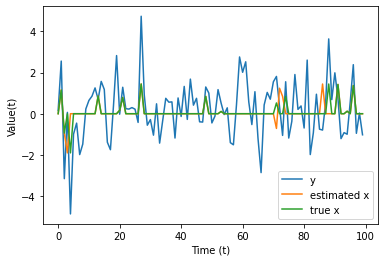

In [21]:
xtvs = np.sum(src.shift_array(X, np.array(tvs.shift_seq, dtype="int")), axis=0)

# Plot the sequences
plt.plot(y)
plt.plot(x)
plt.plot(xtvs)
plt.xlabel("Time (t)")
plt.ylabel("Value(t)")
plt.legend(['y',"estimated x","true x"])
plt.show()

In [22]:
# Statsmodels comparison (no intercept, same as above)
mod = sm.OLS(y, x)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.073
Model:                            OLS   Adj. R-squared (uncentered):              0.063
Method:                 Least Squares   F-statistic:                              7.746
Date:                Sat, 12 Dec 2020   Prob (F-statistic):                     0.00645
Time:                        17:50:32   Log-Likelihood:                         -173.85
No. Observations:                 100   AIC:                                      349.7
Df Residuals:                      99   BIC:                                      352.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Plot the real, observed and estimated scatterplots

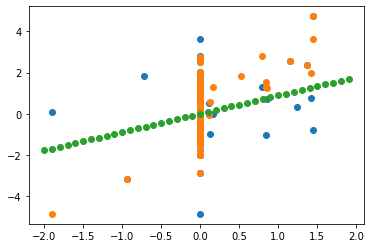

In [23]:
# Plot the fit
plt.scatter(x, y)
plt.scatter(xi, y)
plt.scatter(np.arange(-20,20)/10,(np.arange(-20,20)/10)*0.89)
plt.show()

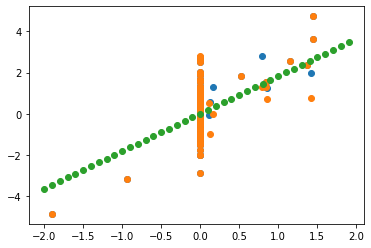

In [25]:
# Plot the fit
plt.scatter(xi, y)
plt.scatter(xtvs, y)
plt.scatter(np.arange(-20,20)/10,(np.arange(-20,20)/10)*1.82)
plt.show()

### Approximate Posterior Distribution of A (with sd & tsd = 1)

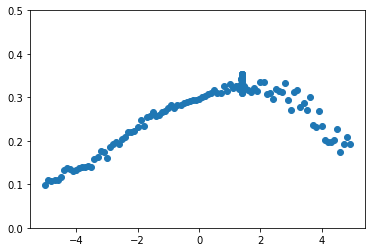